In [116]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from nltk.corpus import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

import string
stopset = stopwords.words('english') + list(string.punctuation)
english_words = set(nltk.corpus.words.words())
import warnings
warnings.filterwarnings('ignore')

words = set(nltk.corpus.words.words())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yanivbronshtein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
json_df = pd.read_json('News_Category_Dataset_v2.json', lines=True)

In [120]:
json_df.columns

Index(['category', 'headline', 'authors', 'link', 'short_description', 'date'], dtype='object')

In [121]:
json_df['summary'] = json_df.headline + '. ' + json_df.short_description

In [122]:
df = json_df[['summary', 'category']]

In [123]:
df['summary'].loc[0]

'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV. She left her husband. He killed their children. Just another day in America.'

In [ ]:
categories_list = ['']

In [124]:
df = df.groupby(by="category").head(1000)


In [125]:
df = df.apply(lambda x: x.astype(str).str.lower())


In [136]:
df.category.unique()

array(['crime', 'entertainment', 'world news', 'impact', 'politics',
       'weird news', 'black voices', 'women', 'comedy', 'queer voices',
       'sports', 'business', 'travel', 'media', 'tech', 'religion',
       'science', 'latino voices', 'education', 'college', 'parents',
       'arts & culture', 'style', 'green', 'taste', 'healthy living',
       'the worldpost', 'good news', 'worldpost', 'fifty', 'arts',
       'wellness', 'parenting', 'home & living', 'style & beauty',
       'divorce', 'weddings', 'food & drink', 'money', 'environment',
       'culture & arts'], dtype=object)

In [ ]:
category_list = ['business', 'crime', 'entertainment', 'tech', 'politics', 'sports']

In [126]:
all_data = df['summary']
all_labels = df['category']

In [127]:
all_data.head(1)

0    there were 2 mass shootings in texas last week...
Name: summary, dtype: object

In [129]:
X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels, train_size=.8,random_state=1)


In [130]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [131]:
labels = model.predict(X_test)

In [132]:
# PART V: put your code after this line and run the cell to display the scores
print('Microaveraged F1 score:', f1_score(y_test, labels, average='micro'))
print('Macroaveraged F1 score:', f1_score(y_test, labels, average='macro'))

Microaveraged F1 score: 0.48841463414634145
Macroaveraged F1 score: 0.487864007605868


Text(340.62000000000006, 0.5, 'predicted label')

<Figure size 144x144 with 0 Axes>

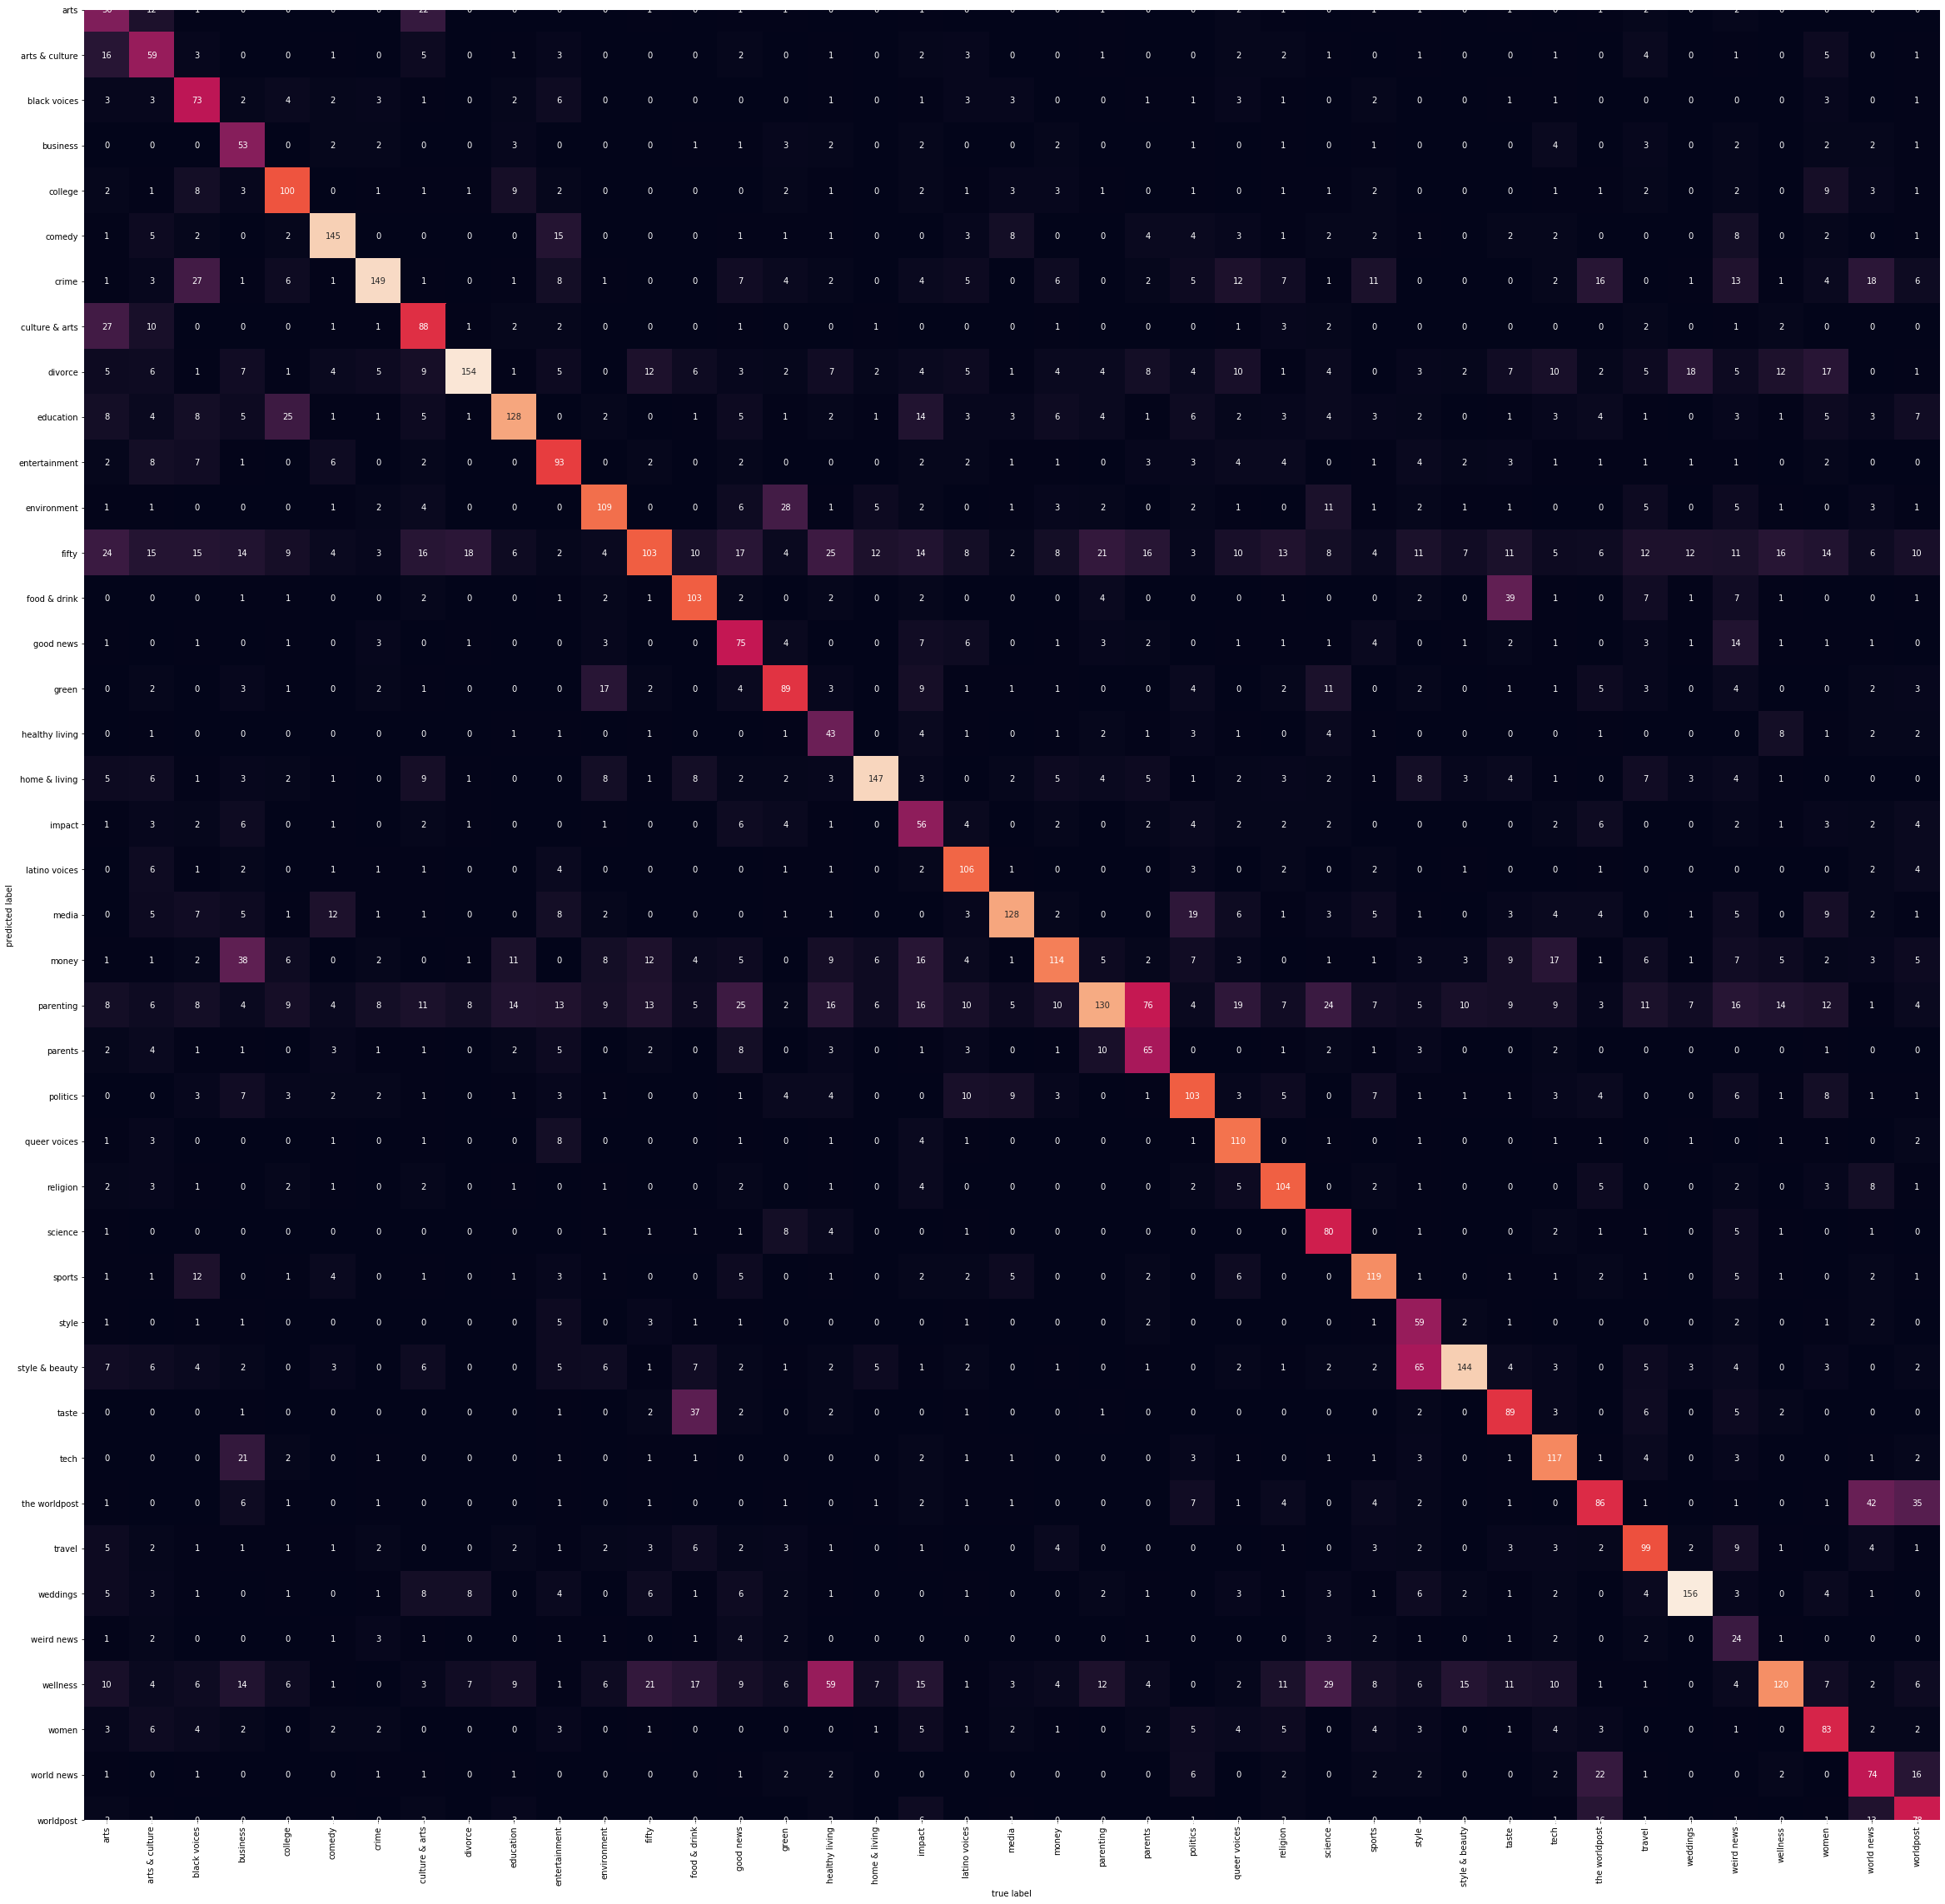

In [133]:
mat = confusion_matrix(y_test, labels)
plt.figure(figsize=(2,2))

fig, ax = plt.subplots(figsize=(40,40))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

plt.xlabel('true label'); plt.ylabel('predicted label')

# Let's try Bert

In [ ]:
def build_model(bert_layer, max_len=512):
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    net = tf.keras.layers.Dense(64, activation='relu')(clf_output)
    net = tf.keras.layers.Dropout(0.2)(net)
    net = tf.keras.layers.Dense(32, activation='relu')(net)
    net = tf.keras.layers.Dropout(0.2)(net)
    out = tf.keras.layers.Dense(5, activation='softmax')(net)
    
    model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(tf.keras.optimizers.Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [13]:
news_df = pd.read_csv('news.csv')
news_df.drop(columns=['Unnamed: 0'], inplace=True)
news_df.head(10)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ...",2018-05-26
6,ENTERTAINMENT,Donald Trump Is Lovin' New McDonald's Jingle I...,Ron Dicker,https://www.huffingtonpost.com/entry/donald-tr...,"It's catchy, all right.",2018-05-26
7,ENTERTAINMENT,What To Watch On Amazon Prime That’s New This ...,Todd Van Luling,https://www.huffingtonpost.com/entry/amazon-pr...,There's a great mini-series joining this week.,2018-05-26
8,ENTERTAINMENT,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,Andy McDonald,https://www.huffingtonpost.com/entry/mike-myer...,"Myer's kids may be pushing for a new ""Powers"" ...",2018-05-26
9,ENTERTAINMENT,What To Watch On Hulu That’s New This Week,Todd Van Luling,https://www.huffingtonpost.com/entry/hulu-what...,You're getting a recent Academy Award-winning ...,2018-05-26


In [14]:
news_df_grouped = news_df.groupby(by="category").head(1000)
links = news_df_grouped.link.to_list()

In [17]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = links[0]


In [ ]:
html = urlopen(url).read()

In [26]:
news_df_grouped['summary'] = news_df_grouped["headline"] + ". " +  news_df_grouped["short_description"]

In [61]:
def clean_string(row):
    return " ".join(w for w in nltk.wordpunct_tokenize(row) if w.lower() in words or not w.isalpha())

In [62]:
df = news_df_grouped.apply(lambda x: x.astype(str).str.lower())
df = df.apply(clean_string)

TypeError: ('expected string or bytes-like object', 'occurred at index category')

In [64]:
df = df[['summary','category']]

In [ ]:
!pip install tr

In [67]:
df = (df.head(2)).apply(clean_string)

TypeError: ('expected string or bytes-like object', 'occurred at index summary')

In [57]:
df.summary.to_list()[0]

'there were 2 mass shootings in texas last week, but only 1 on tv. she left her husband. he killed their children. just another day in america.'

In [49]:
all_data = news_df_grouped['summary']
all_labels = news_df_grouped['category']



0    There Were 2 Mass Shootings In Texas Last Week...
1    Will Smith Joins Diplo And Nicky Jam For The 2...
Name: summary, dtype: object 

0            CRIME
1    ENTERTAINMENT
Name: category, dtype: object 

Total number of reviews: 41000
Total number of labels: 41000


In [ ]:
print(all_data[:2], '\n')
print(all_labels[:2], '\n')

print('Total number of reviews:', len(all_data))
print('Total number of labels:', len(all_labels))

In [ ]:
def clean_df():
    words = set(nltk.corpus.words.words())

In [50]:
X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels, train_size=.8)
print('Length of X_train:', len(X_train)); print('Length of y_train:', len(y_train))

Length of X_train: 32800
Length of y_train: 32800


In [88]:
labels = model.predict(X_test)

In [16]:
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

script.extract() for script in soup(["script", "style"])
text = soup.get_text()

lines = [line.strip() for line in text.splitlines()]
chunks = [phrase.strip() for line in lines for phrase in line.split("  ")]

text = '\n'.join(chunk for chunk in chunks if chunk)

SyntaxError: invalid syntax (<ipython-input-16-620c9eb633f0>, line 4)